In [9]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

data = pd.read_csv('/content/EastWestAirlines.csv')

data.fillna(data.mean(), inplace=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


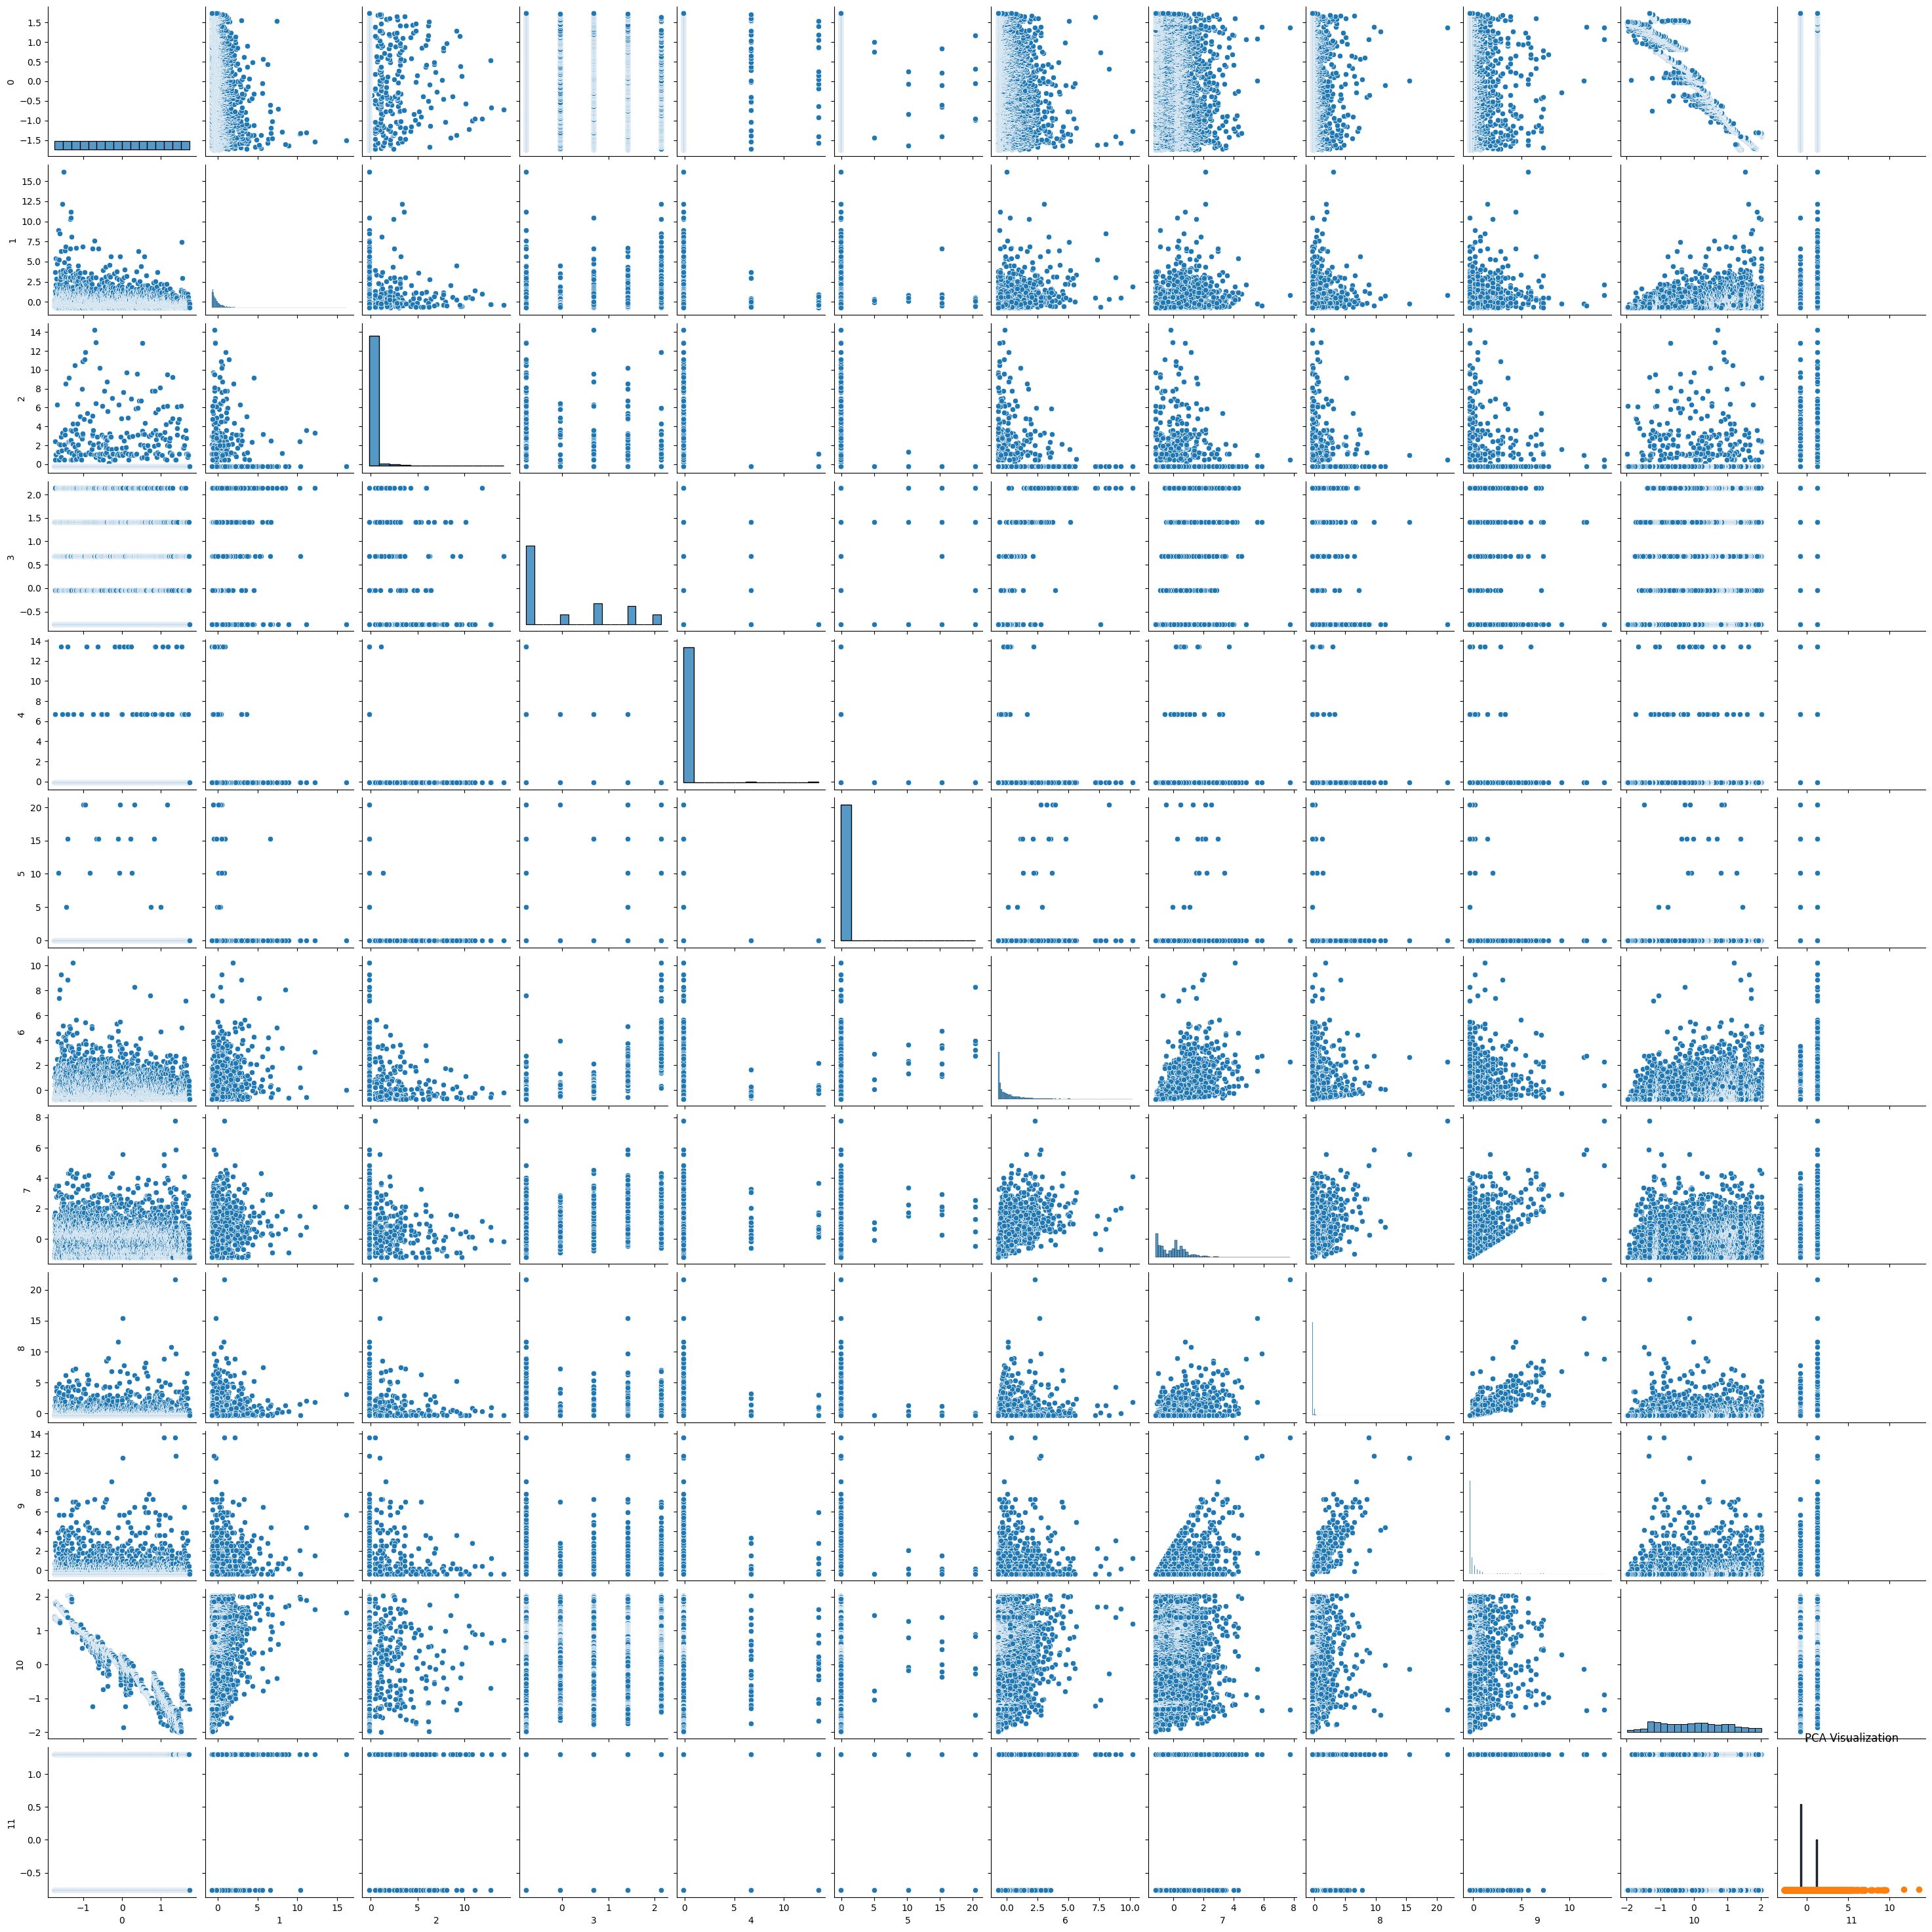

In [3]:
sns.pairplot(pd.DataFrame(scaled_data))

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title("PCA Visualization")
plt.show()

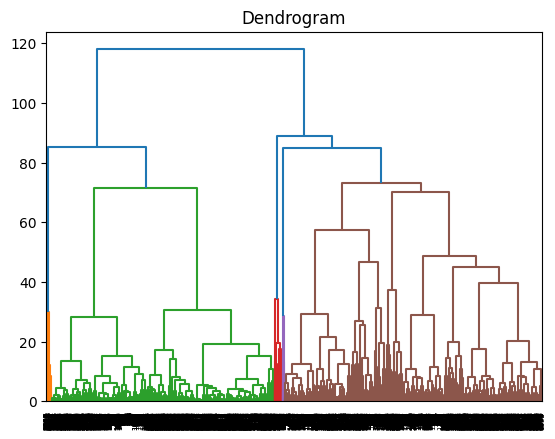

In [4]:
kmeans = KMeans(n_clusters=3)
kmeans_labels = kmeans.fit_predict(scaled_data)

hierarchy = linkage(scaled_data, method='ward')
dendrogram(hierarchy)
plt.title("Dendrogram")
plt.show()

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

In [5]:
print("K-Means Cluster Centers:")
print(kmeans.cluster_centers_)

print("DBSCAN Unique Clusters:")
print(set(dbscan_labels))


K-Means Cluster Centers:
[[ 0.26938414 -0.31117205 -0.0684544  -0.59086873  0.03325844 -0.06276658
  -0.50725821 -0.48109103 -0.19015095 -0.2049511  -0.27576716 -0.34602405]
 [-0.22547568  1.14826697  0.83324966  0.08964024  0.14957307 -0.06276658
   0.60608195  1.61559764  3.5430272   3.81466428  0.26077939  0.91247937]
 [-0.4904253   0.45544049  0.02755603  1.12635521 -0.08274164  0.12869303
   0.90077976  0.72411576 -0.07712851 -0.08261508  0.49829786  0.55203515]]
DBSCAN Unique Clusters:
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, -1}


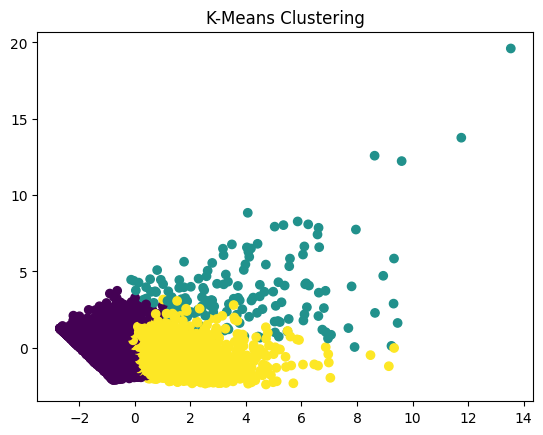

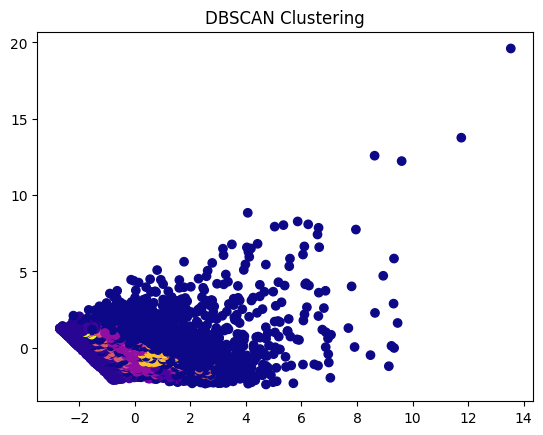

In [6]:
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-Means Clustering")
plt.show()

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=dbscan_labels, cmap='plasma')
plt.title("DBSCAN Clustering")
plt.show()


In [10]:
kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
dbscan_silhouette = silhouette_score(scaled_data, dbscan_labels)

print(f"K-Means Silhouette Score: {kmeans_silhouette}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")


K-Means Silhouette Score: 0.28094828366390856
DBSCAN Silhouette Score: -0.2823258834687895
